# DATA UNDERSTANDING

In [3]:
# Import the libraries
import pandas as pd
import numpy as np 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
# Read data using pandas dataframe and find the size of the dataset
my_rawdata = pd.read_csv('http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv')
my_rawdata.shape

(221738, 40)

In [6]:
# Take a look at the dataset
my_rawdata.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [19]:
# Check how many null objects in the dataset 
my_rawdata.isnull().sum()

X                    7478
Y                    7478
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3714
INTKEY             149711
LOCATION             4593
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209953
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26451
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11979
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SDOTCOLNUM          94533
SPEEDING           211802
ST_COLCODE           9413
ST_COLDESC          26451
SEGLANEKEY              0
CROSSWALKKEY

In [20]:
# Get basic information about the dataset
my_rawdata.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 

In [3]:
# Check INCDTTM values
my_rawdata['INCDTTM'].value_counts()

11/2/2006                103
10/8/2004                 98
10/3/2008                 92
11/5/2005                 85
1/2/2004                  80
                        ... 
12/23/2006 7:40:00 PM      1
7/23/2008 6:30:00 PM       1
6/26/2013 7:52:00 PM       1
10/11/2006 4:57:00 PM      1
8/23/2011 8:00:00 PM       1
Name: INCDTTM, Length: 169669, dtype: int64

In [21]:
# Check SEVERITYCODE values
my_rawdata['SEVERITYCODE'].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [22]:
# Check SVERITYDESC values
my_rawdata['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137776
Injury Collision                   58842
Unknown                            21657
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

We will use SEVERITYCODE as the TARGET

# DATA PREPARATION

In [5]:
# Drop "Unknown" value from SEVERITYDESC column
my_rawdata = my_rawdata[my_rawdata.SEVERITYDESC != "Unknown"]

# Group all injuries to SEVERITYCODE=2
my_rawdata['SEVERITYCODE']= my_rawdata['SEVERITYCODE'].replace(['2b', '3'], '2')
my_rawdata['SEVERITYCODE'] = my_rawdata['SEVERITYCODE'].astype(float)
my_rawdata['SEVERITYCODE'].value_counts()

1.0    137776
2.0     62305
Name: SEVERITYCODE, dtype: int64

In [24]:
# Check UNDERINFL values
my_rawdata['UNDERINFL'].value_counts()

N    104000
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [6]:
# Convert the values in UNDERINFL columnn: assign NaN and N to 0 and Y to 1
my_rawdata['UNDERINFL'] = my_rawdata['UNDERINFL'].replace(['Y', 'N'], ['1','0'])
my_rawdata['UNDERINFL'] = my_rawdata['UNDERINFL'].astype(float)
my_rawdata['UNDERINFL'].value_counts()

0.0    185676
1.0      9629
Name: UNDERINFL, dtype: int64

In [5]:
# Check INCDTTM values
my_rawdata['INCDTTM'].value_counts()

11/2/2006                103
10/8/2004                 98
10/3/2008                 92
11/5/2005                 85
1/2/2004                  80
                        ... 
12/23/2006 7:40:00 PM      1
7/23/2008 6:30:00 PM       1
6/26/2013 7:52:00 PM       1
10/11/2006 4:57:00 PM      1
8/23/2011 8:00:00 PM       1
Name: INCDTTM, Length: 169669, dtype: int64

In [6]:
# Check SPEEDING values
my_rawdata['SPEEDING'].value_counts()

Y    9936
Name: SPEEDING, dtype: int64

In [7]:
# Check INATTENTIONIND values
my_rawdata['INATTENTIONIND'].value_counts()

Y    30188
Name: INATTENTIONIND, dtype: int64

In [7]:
# Convert the values in INATTENTIONIND columnn: assign Y to 1 and else to 0
my_rawdata['INATTENTIONIND'] = my_rawdata['INATTENTIONIND'].apply(lambda x: 0 if x != "Y" else 1)
my_rawdata['INATTENTIONIND'] = my_rawdata['INATTENTIONIND'].astype(float)

# Convert the values in SPEEDING columnn: assign Y to 1 and else to 0
my_rawdata['SPEEDING'] = my_rawdata['SPEEDING'].apply(lambda x: 0 if x != "Y" else 1)
my_rawdata['SPEEDING'] = my_rawdata['SPEEDING'].astype(float)

# Convert the dates in INCDATE columnn to day of the week
my_rawdata['INCDATE'] = pd.to_datetime(my_rawdata['INCDATE'],format='%Y/%m/%d')
my_rawdata['INCDATE'] = my_rawdata['INCDATE'].dt.dayofweek
my_rawdata['INCDATE'] = my_rawdata['INCDATE'].astype(float)

# Data visualization and pre-processing

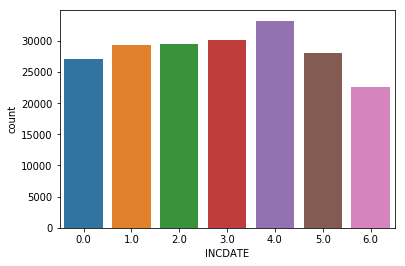

In [44]:
# Check INCDATE values
ax = sns.countplot(x="INCDATE", data=my_rawdata)

We will leave INCDATE as day of the week. Most of the incidents are on Fridays.

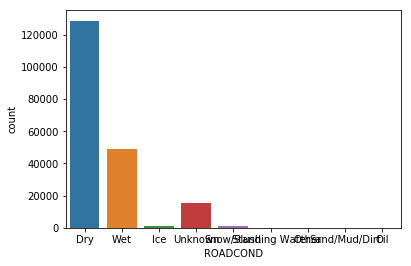

In [19]:
ax = sns.countplot(x="ROADCOND", data=my_rawdata)

In [9]:
# Check values of ROADCOND
my_rawdata['ROADCOND'].value_counts()

Dry               128660
Wet                48737
Unknown            15139
Ice                 1232
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

In [8]:
# Convert the categorical values in ROADCOND columnn: assign Unknown and Other to 99
my_rawdata['ROADCOND'] = my_rawdata['ROADCOND'].replace(['Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'], [1,2,99,3,4,99,5,6,7])
my_rawdata['ROADCOND'].value_counts()

1.0     128660
2.0      48734
99.0     15275
3.0       1232
4.0       1014
5.0        119
6.0         77
7.0         64
Name: ROADCOND, dtype: int64

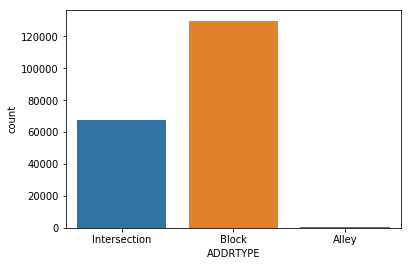

In [45]:
ax = sns.countplot(x="ADDRTYPE", data=my_rawdata)

In [9]:
# Convert the categorical values in ADDRTYPE
my_rawdata['ADDRTYPE'] = my_rawdata['ADDRTYPE'].replace(['Intersection', 'Block', 'Alley'], [2,1,0])
my_rawdata['ADDRTYPE'].value_counts()

1.0    129852
2.0     67532
0.0       764
Name: ADDRTYPE, dtype: int64

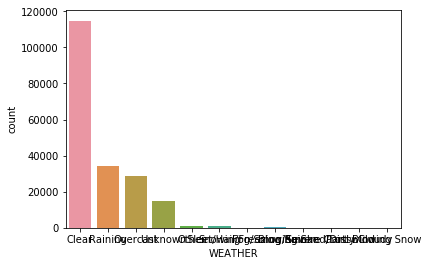

In [48]:
ax = sns.countplot(x="WEATHER", data=my_rawdata)

In [15]:
# Check values of WEATHER
my_rawdata['WEATHER'].value_counts()

Clear                       114806
Raining                      34037
Overcast                     28555
Unknown                      15131
Snowing                        919
Other                          860
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                   10
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [10]:
# Convert the categorical values in WEATHER columnn: assign Unknown and Other to 99
my_rawdata['WEATHER'] = my_rawdata['WEATHER'].replace(['Clear', 'Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy', 'Blowing Snow', 'Unknown', 'Other'], [1,2,3,4,5,6,7,8,9,10,99,99])
my_rawdata['WEATHER'].value_counts()

1.0     114806
2.0      34037
3.0      28555
99.0     15991
4.0        919
5.0        577
6.0        116
7.0         56
8.0         26
9.0         10
10.0         1
Name: WEATHER, dtype: int64

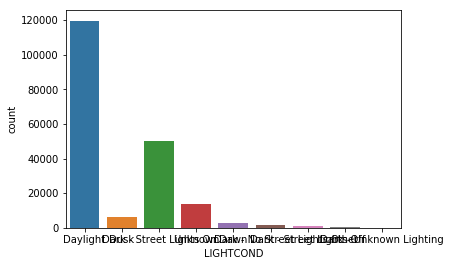

In [51]:
ax = sns.countplot(x="LIGHTCOND", data=my_rawdata)

In [52]:
# Check values of LIGHTCOND
my_rawdata['LIGHTCOND'].value_counts()

Daylight                    119552
Dark - Street Lights On      50139
Unknown                      13533
Dusk                          6085
Dawn                          2609
Dark - No Street Lights       1580
Dark - Street Lights Off      1239
Other                          244
Dark - Unknown Lighting         24
Name: LIGHTCOND, dtype: int64

In [11]:
# Convert the categorical values in LIGHTCOND columnn: assign Unknown and Other to 99
my_rawdata['LIGHTCOND'] = my_rawdata['LIGHTCOND'].replace(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting', 'Unknown', 'Other'], [1,2,3,4,5,6,7,99,99])
my_rawdata['LIGHTCOND'].value_counts()

1.0     119552
2.0      50139
99.0     13777
3.0       6085
4.0       2609
5.0       1580
6.0       1239
7.0         24
Name: LIGHTCOND, dtype: int64

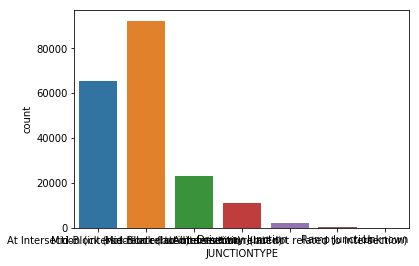

In [54]:
ax = sns.countplot(x="JUNCTIONTYPE", data=my_rawdata)

In [55]:
# Check values in JUNCTIONTYPE
my_rawdata['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              92224
At Intersection (intersection related)               65233
Mid-Block (but intersection related)                 23079
Driveway Junction                                    10852
At Intersection (but not related to intersection)     2130
Ramp Junction                                          171
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [12]:
# Convert the categorical values in JUNCTIONTYPE columnn: assign Unknown and Other to 99
my_rawdata['JUNCTIONTYPE'] = my_rawdata['JUNCTIONTYPE'].replace(['Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)', 'Driveway Junction', 'At Intersection (but not related to intersection)', 'Ramp Junction', 'Unknown'], [1,2,3,4,5,6,99])
my_rawdata['JUNCTIONTYPE'].value_counts()

1.0     92224
2.0     65233
3.0     23079
4.0     10852
5.0      2130
6.0       171
99.0        9
Name: JUNCTIONTYPE, dtype: int64

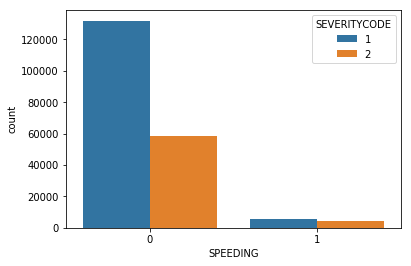

In [97]:
ax = sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=my_rawdata)

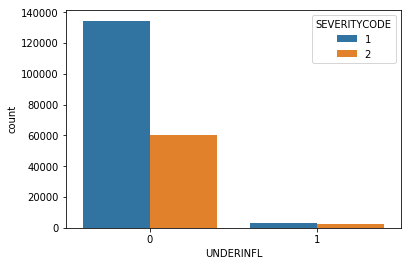

In [98]:
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYCODE",  data=my_rawdata)

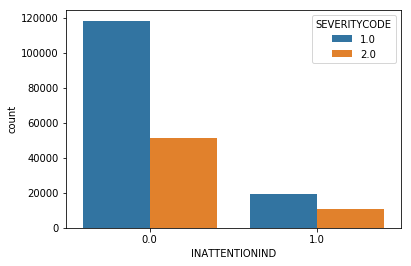

In [57]:
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYCODE",  data=my_rawdata)

## CONSTRUCT DATASET WITH 9 FEATURES

In [13]:
# Select attributes to be included in the datamodel
my_data = my_rawdata[['INATTENTIONIND', 'JUNCTIONTYPE', 'ROADCOND', 'WEATHER', 'UNDERINFL', 'INCDATE', 'LIGHTCOND', 'ADDRTYPE', 'SPEEDING', 'SEVERITYCODE']]
my_data = my_data.dropna()
my_data.shape

(188346, 10)

In [14]:
my_data.head()

,INATTENTIONIND,JUNCTIONTYPE,ROADCOND,WEATHER,UNDERINFL,INCDATE,LIGHTCOND,ADDRTYPE,SPEEDING,SEVERITYCODE
0,0.0,2.0,1.0,1.0,0.0,6.0,1.0,2.0,0.0,1.0
1,1.0,1.0,2.0,2.0,0.0,0.0,3.0,1.0,0.0,1.0
2,0.0,1.0,1.0,1.0,0.0,6.0,2.0,1.0,0.0,2.0
3,0.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0
4,0.0,1.0,3.0,1.0,0.0,4.0,2.0,1.0,1.0,2.0


In [15]:
# check if the dataset is balance
my_data['SEVERITYCODE'].value_counts()

1.0    127609
2.0     60737
Name: SEVERITYCODE, dtype: int64

Imbalance dataset - almost 70% of the incidents is property damage only

## FEATURE SELECTION

In [27]:
# Feature Selection with Univariate Statistical Tests
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# load data
array = my_data.values
X = array[:,0:9]
Y = array[:,9]

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[ 243.689 1377.797 3800.628 3811.59   469.701   53.431 3642.913 7484.274
  354.116]
[[1. 1. 1. 2.]
 [2. 2. 3. 1.]
 [1. 1. 2. 1.]
 [2. 2. 2. 2.]
 [3. 1. 2. 1.]]


Attribute       |   Score 
--------------- | ----------
INATTENTIONIND  |   243.689
JUNCTIONTYPE    |   1377.797
ROADCOND        |   3800.628
WEATHER         |   3811.59
UNDERINFL       |   469.701
INCDATE         |   53.431
LIGHTCOND       |   3642.913
ADDRTYPE        |   7484.274
SPEEDING        |   354.116


We select four best features (based on the highest scores): features with index 7 (ADDRTYPE), 3 (WEATHER), 2 (ROADCOND), and 6 (LIGHTCOND).

## IMBALANCED DATASET

In [16]:
imb_df = my_data[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']]
imb_df.head()

,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,2.0,1.0,1.0,1.0,1.0
1,1.0,2.0,2.0,3.0,1.0
2,1.0,1.0,1.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0
4,1.0,1.0,3.0,2.0,2.0


In [17]:
imb_df.shape

(188346, 5)

In [18]:
# Feature matrix
x = imb_df[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values
x[0:5]

array([[2., 1., 1., 1.],
       [1., 2., 2., 3.],
       [1., 1., 1., 2.],
       [2., 2., 2., 2.],
       [1., 1., 3., 2.]])

In [19]:
# Target variable / response vector
y = imb_df['SEVERITYCODE']
y[0:5]

0    1.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: SEVERITYCODE, dtype: float64

## Train Test Split

In [20]:
# Train/test dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (150676, 4) (150676,)
Test set: (37670, 4) (37670,)


# MODELING



In [21]:
# Import libraries
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, jaccard_score

import scipy.optimize as opt

## SVM (Support Vector Machine)

In [23]:
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(x_train, y_train) 
yhat = clf.predict(x_test)

In [24]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         1.0       0.68      1.00      0.81     25429
         2.0       0.00      0.00      0.00     12241

    accuracy                           0.68     37670
   macro avg       0.34      0.50      0.40     37670
weighted avg       0.46      0.68      0.54     37670



In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print (confusion_matrix(y_test, yhat, labels=[1,2]))

Confusion matrix, without normalization
[[25429     0]
 [12241     0]]
[[25429     0]
 [12241     0]]


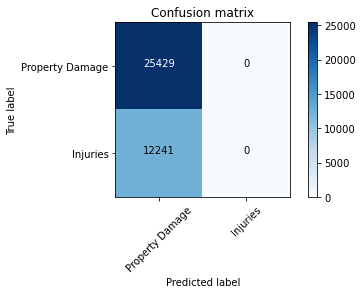

In [26]:
# Compute Confusion Matrix
np.set_printoptions(precision=2)
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage', 'Injuries'], normalize= False,  title='Confusion matrix')

In [27]:
# F1 score for accuracy
f1_score(y_test, yhat, average='weighted')

0.54408964742066

In [29]:
# Jaccard index for accuracy
jaccard_score(y_test, yhat, average='weighted')

0.45568771784704315

 ## KNN

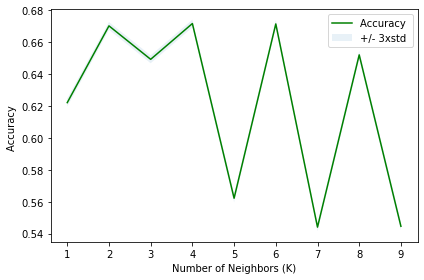

In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6718078046190603 with k= 4


In [84]:
# Recalculate using k=4
neigh = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)
yhat=neigh.predict(x_test)

# F1 score for accuracy
f1_score(y_test, yhat, average='weighted')

0.5762360799733574

In [85]:
# Jaccard index for accuracy
jaccard_score(y_test, yhat, average='weighted')

0.46840983664284613

## Decision Tree

In [86]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DecTree.fit(x_train,y_train)
predTree = DecTree.predict(x_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees&#39;s Accuracy:  0.6752588266525086


In [87]:
# Calculate F1-score for accuracy
f1_score(y_test, predTree, average='weighted')

0.546378209778435

In [88]:
# Calculate Jaccard index for accuracy
jaccard_score(y_test, predTree, average='weighted')

0.4567598779989197

## Logistic Regression

In [35]:
xLR = np.asarray(x).astype('float')
yLR = np.asarray(y).astype('float')

# Normalize the dataset
X = preprocessing.StandardScaler().fit(xLR).transform(xLR)

# Train/test dataset
from sklearn.model_selection import train_test_split
xLR_train, xLR_test, yLR_train, yLR_test = train_test_split( xLR, yLR, test_size=0.2, random_state=4)

# Modeling

LR = LogisticRegression(C=0.01, solver='liblinear').fit(xLR_train,yLR_train)

yLRhat = LR.predict(xLR_test)
yLRhat_prob = LR.predict_proba(xLR_test)

# Log loss
from sklearn.metrics import log_loss
log_loss(yLR_test, yLRhat_prob)

0.5982045474709149

In [89]:
# Calculate F1-score for accuracy
f1_score(yLR_test, yLRhat, average='weighted')

0.54408964742066

In [90]:
# Calculate Jaccard index for accuracy
jaccard_score(yLR_test, yLRhat, average='weighted')

0.45568771784704315

## 
## SOLVING IMBALANCE DATASET
## Ensemble Method - Balanced Bagging Classifier

## SVC

In [106]:
# bagged decision trees on an imbalanced classification problem
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=SVC(),
                                sampling_strategy='all',
                                replacement=False,
                                random_state=125)


#Train the classifier.
bbc.fit(x_train, y_train)
preds = bbc.predict(x_test)

print("SVC's Accuracy after balancing the dataset: ", balanced_accuracy_score(y_test, preds))

SVC&#39;s Accuracy after balancing the dataset:  0.6035814026999652


In [107]:
# Calculate f1-score to measure accuracy
f1_score(y_test, preds, average='weighted')

0.6499472397629144

In [108]:
# Calculate Jaccard index for accuracy
jaccard_score(y_test, preds, average='weighted')

0.49366990941651423

In [109]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.74      0.73      0.74     25429
         2.0       0.46      0.48      0.47     12241

    accuracy                           0.65     37670
   macro avg       0.60      0.60      0.60     37670
weighted avg       0.65      0.65      0.65     37670



## KNN

In [94]:
# bagged decision trees on an imbalanced classification problem
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import balanced_accuracy_score
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(),
                                sampling_strategy='all',
                                replacement=False,
                                random_state=133)


#Train the classifier.
bbc.fit(x_train, y_train)
preds = bbc.predict(x_test)

print("KNN's Accuracy after balancing the dataset: ", balanced_accuracy_score(y_test, preds))

KNN&#39;s Accuracy after balancing the dataset:  0.5174144416073909


In [95]:
# Calculate f1-score to measure accuracy
f1_score(y_test, preds, average='weighted')

0.584701412149935

In [96]:
# Calculate Jaccard index for accuracy
jaccard_score(y_test, preds, average='weighted')

0.46937772961869945

## DECISION TREE

In [103]:
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='all',
                                replacement=False,
                                random_state=3)


#Train the classifier.
bbc.fit(x_train, y_train)
preds = bbc.predict(x_test)

print("Decision Trees's Accuracy after balancing the dataset: ", balanced_accuracy_score(y_test, preds))

Decision Trees&#39;s Accuracy after balancing the dataset:  0.6034016219585482


In [104]:
# Calculate F1-score for accuracy
f1_score(y_test, preds, average='weighted')

0.6493061918498166

In [105]:
# Calculate Jaccard index for accuracy
jaccard_score(y_test, preds, average='weighted')

0.492817958102555

## Log Regression

In [100]:
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=LogisticRegression(),
                                sampling_strategy='all',
                                replacement=False,
                                random_state=13)


#Train the classifier.
bbc.fit(x_train, y_train)
preds = bbc.predict(x_test)

print("Log Regression's Accuracy after balancing the dataset: ", balanced_accuracy_score(y_test, preds))

Log Regression&#39;s Accuracy after balancing the dataset:  0.6038704818051587


In [101]:
# Calculate F1-score for accuracy
f1_score(y_test, preds, average='weighted')

0.6498910654196316

In [102]:
# Calculate Jaccard index for accuracy
jaccard_score(y_test, preds, average='weighted')

0.4934986190553042

## SOLVING IMBALANCE DATASET
## Undersampling

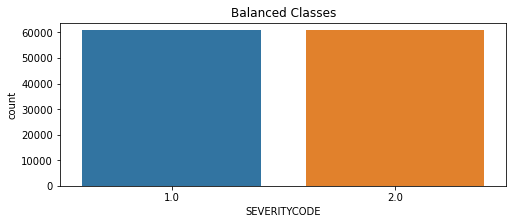

In [36]:
# Shuffle dataset
shuffled_df = imb_df.sample(frac=1,random_state=52)

# Put all severity code = 2 class in a separate dataset
sev2_df = shuffled_df[shuffled_df['SEVERITYCODE'] == 2]


# Randomly select 62305 observations from the majority class (severity code = 1)
sev1_df = shuffled_df[shuffled_df['SEVERITYCODE'] == 1].sample(n=60737,random_state=25)

# Concatenate both dataframes again
bal_df = pd.concat([sev1_df, sev2_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 3))
sns.countplot('SEVERITYCODE', data=bal_df)
plt.title('Balanced Classes')
plt.show()


In [37]:
bal_df.head()

,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
178513,2.0,1.0,1.0,1.0,1.0
44957,1.0,1.0,1.0,1.0,1.0
52166,1.0,5.0,1.0,2.0,1.0
161519,1.0,99.0,99.0,1.0,1.0
95067,1.0,3.0,2.0,2.0,1.0


In [39]:
# Target variable / response vector
Y = bal_df['SEVERITYCODE']

# Feature matrix
X = bal_df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE']].values

# Train/test dataset
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=45)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (97179, 4) (97179,)
Test set: (24295, 4) (24295,)


## DECISION TREE

In [81]:
DecTree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DecTree2.fit(X_train,Y_train)
predTree2 = DecTree2.predict(X_test)

print("Decision Trees's Accuracy: ", metrics.accuracy_score(Y_test, predTree2))

Decision Trees&#39;s Accuracy:  0.6002881251286273


In [82]:
# Calculate f1-score to measure accuracy
f1_score(Y_test, predTree2, average='weighted')

0.5941436633662804

In [83]:
# Calculate Jaccard index for accuracy
jaccard_score(Y_test, predTree2, average='weighted')

0.42435756661809604

## KNN

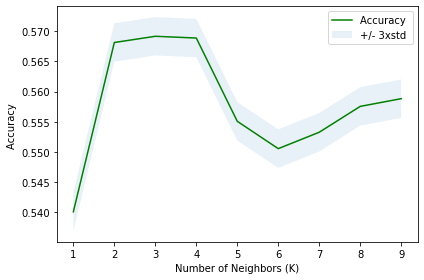

In [71]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh2 = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Yhat2=neigh2.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Yhat2)

    std_acc[n-1]=np.std(Yhat2==Y_test)/np.sqrt(Yhat2.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [45]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5691706112368801 with k= 3


In [72]:
# Recalculate prediction using k=3
neigh2 = KNeighborsClassifier(n_neighbors = 3).fit(X_train,Y_train)
Yhat2=neigh2.predict(X_test)

In [73]:
# Calculate f1-score to measure accuracy
f1_score(Y_test, Yhat2, average='weighted')

0.5690858339443098

In [74]:
# Calculate Jaccard index for accuracy
jaccard_score(Y_test, Yhat2, average='weighted')

0.3977264370709183

## Log Regression

In [80]:
import scipy.optimize as opt

XLR = np.asarray(X).astype('float')
YLR = np.asarray(Y).astype('float')

# Normalize the dataset
X = preprocessing.StandardScaler().fit(XLR).transform(XLR)

# Train/test dataset
from sklearn.model_selection import train_test_split
XLR_train, XLR_test, YLR_train, YLR_test = train_test_split( XLR, YLR, test_size=0.2, random_state=4)

# Modeling
from sklearn.linear_model import LogisticRegression
BLR = LogisticRegression(C=0.01, solver='liblinear').fit(XLR_train,YLR_train)

YLRhat = BLR.predict(XLR_test)
YLRhat_prob = BLR.predict_proba(XLR_test)

# Log loss
from sklearn.metrics import log_loss
log_loss(YLR_test, YLRhat_prob)

0.6571005745315281

In [76]:
# Calculate f1-score to measure accuracy
f1_score(YLR_test, YLRhat, average='weighted')

0.5930746006191737

In [77]:
# Calculate Jaccard index for accuracy
jaccard_score(YLR_test, YLRhat, average='weighted')

0.4235905605996017

## SVM

In [47]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train, Y_train) 

SVC(gamma=&#39;auto&#39;)

In [48]:
Yhat = clf.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
print (classification_report(Y_test, Yhat))

              precision    recall  f1-score   support

         1.0       0.58      0.73      0.64     12097
         2.0       0.64      0.48      0.55     12198

    accuracy                           0.60     24295
   macro avg       0.61      0.60      0.59     24295
weighted avg       0.61      0.60      0.59     24295



In [50]:
# F1 score for accuracy
f1_score(Y_test, Yhat, average='weighted')

0.594745052129691

In [52]:
# Jaccard index for accuracy
jaccard_score(Y_test,Yhat,  average='weighted')

0.42500622980430586